In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
serie = 1000
x_aux = [] #Natural numbers until serie
x_aux = np.arange(serie)
serie = (np.sin(2 * np.pi * 4 * x_aux / serie) + 1) / 2


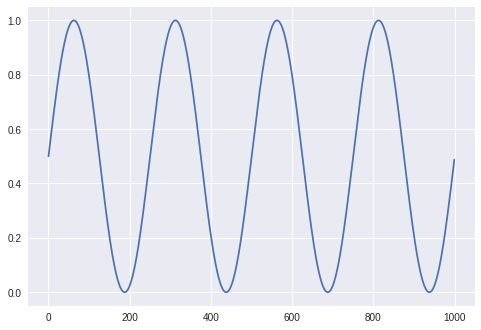

In [4]:
plt.plot(x_aux, serie)
plt.show()


In [6]:

maxlen = 5
seq = []
res = []
for i in range(0, len(serie) - maxlen):
    seq.append(serie[i:maxlen+i])
    res.append(serie[maxlen+i])
print(seq[:5])
print(res[:5])


[array([0.5       , 0.51256505, 0.52512216, 0.5376634 , 0.55018086]), array([0.51256505, 0.52512216, 0.5376634 , 0.55018086, 0.56266662]), array([0.52512216, 0.5376634 , 0.55018086, 0.56266662, 0.57511279]), array([0.5376634 , 0.55018086, 0.56266662, 0.57511279, 0.58751153]), array([0.55018086, 0.56266662, 0.57511279, 0.58751153, 0.59985499])]
[0.5626666167821521, 0.5751127945603786, 0.5875115294876381, 0.5998549902572035, 0.6121353804746906]


In [7]:
x = np.array(seq)
y = np.array(res)
x = x.reshape(x.shape[0], x.shape[1], 1)
y = y.reshape(y.shape[0], 1)
print('Shape of x {}'.format(x.shape))
print('Shape of y {}'.format(y.shape))


Shape of x (995, 5, 1)
Shape of y (995, 1)


In [8]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))


Shape of x_train (796, 5, 1)
Shape of y_train (796, 1)
Shape of x_test (199, 5, 1)
Shape of y_test (199, 1)


In [9]:
tf.set_random_seed(1)
model = Sequential()
model.add(LSTM(1, input_shape=(maxlen, 1)))   
model.add(Dense(1, activation='linear'))      
model.compile(loss='mse', optimizer='rmsprop')


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
error = model.evaluate(x_test, y_test)
print('MSE: {:.5f}'.format(error))


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1s - loss: 0.4022
Epoch 2/5
 - 0s - loss: 0.3674
Epoch 3/5
 - 0s - loss: 0.3383
Epoch 4/5
 - 0s - loss: 0.3115
Epoch 5/5
 - 0s - loss: 0.2868
199/199 [==============================] - 0s 579us/step
MSE: 0.21822


Prediction shape: (199, 1)


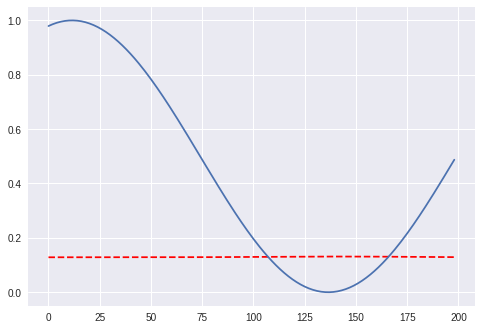

In [11]:
prediction = model.predict(x_test)
print('Prediction shape: {}'.format(prediction.shape))
plt.plot(range(len(x_test)), prediction.reshape(prediction.shape[0]), '--r')
plt.plot(range(len(y_test)), y_test)
plt.show()


In [0]:
model2 = Sequential()
model2.add(LSTM(4,input_shape=(maxlen,1)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='mse', optimizer='rmsprop')


In [14]:
history = model2.fit(x_train, y_train,
                     batch_size=8,
                     epochs=25, 
                     verbose=1)
error = model2.evaluate(x_test, y_test)
print('MSE: {:.5f}'.format(error))


Epoch 1/25
796/796 [==============================] - 1s 2ms/step - loss: 0.0955
Epoch 2/25
796/796 [==============================] - 0s 434us/step - loss: 0.0667
Epoch 3/25
796/796 [==============================] - 0s 510us/step - loss: 0.0336
Epoch 4/25
796/796 [==============================] - 0s 505us/step - loss: 0.0129
Epoch 5/25
796/796 [==============================] - 0s 498us/step - loss: 0.0078
Epoch 6/25
796/796 [==============================] - 0s 463us/step - loss: 0.0067
Epoch 7/25
796/796 [==============================] - 0s 479us/step - loss: 0.0060
Epoch 8/25
796/796 [==============================] - 0s 477us/step - loss: 0.0054
Epoch 9/25
796/796 [==============================] - 0s 450us/step - loss: 0.0050
Epoch 10/25
796/796 [==============================] - 0s 450us/step - loss: 0.0046
Epoch 11/25
796/796 [==============================] - 0s 424us/step - loss: 0.0043
Epoch 12/25
796/796 [==============================] - 0s 401us/step - loss: 0.0040
Epo

(199, 5, 1)


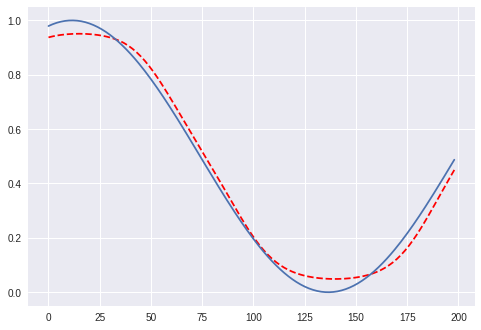

In [15]:
predict_2 = model2.predict(x_test)
predict_2 = predict_2.reshape(predict_2.shape[0]) 
print(x_test.shape)
plt.plot(range(len(x_test)),predict_2, '--r')
plt.plot(range(len(y_test)), y_test)
plt.show()
